# Método de Sundaresan

## Exemplo 3.3.1

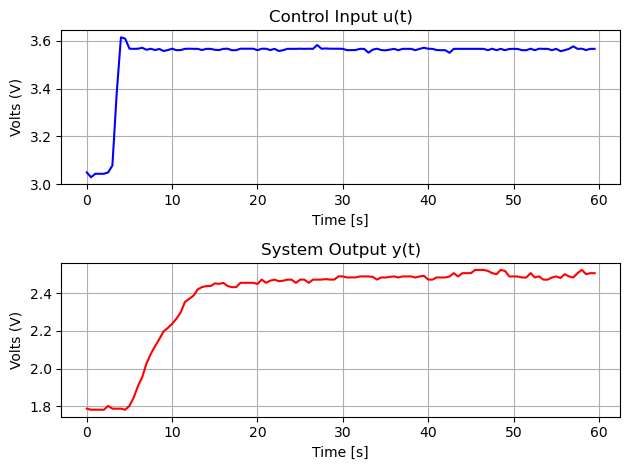

In [140]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('bfg3.dat')

t = data[:, 0]
u = data[:, 1]
y = data[:, 2]

Samples = len(t)

plt.subplot(2, 1, 1)
plt.plot(t, u, 'b-')
plt.title('Control Input u(t)')
plt.xlabel('Time [s]')
plt.ylabel('Volts (V)')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(t, y, 'r-')
plt.title('System Output y(t)')
plt.xlabel('Time [s]')
plt.ylabel('Volts (V)')
plt.grid()
plt.tight_layout()
plt.show()

1. Primeiro deve-se achar o ganho $K$ em regime permanente dividindo-se
a variação de saída pela amplitude do degrau aplicado à entrada

In [141]:
# Coletou-se a média dos valores iniciais 
# e finais de entrada e saída
# 
# Depois calculou-se o ganho K = deltaY / deltaU

ui = np.mean(u[0:5])
yi = np.mean(y[0:5])

uf = np.mean(u[110:Samples])
yf = np.mean(y[110:Samples])

deltaY = yf - yi
deltaU = uf - ui

print(f'Delta Y = {deltaY:.4f}')
print(f'Delta U = {deltaU:.4f}')

K = deltaY / deltaU
print(f'Ganho K = {K:.4f}')

Delta Y = 0.7153
Delta U = 0.5243
Ganho K = 1.3642


2. Remova o valor da condição inicial e normalize os dados de maneira a ter
uma resposta entre 0 e 1

* Deve-se encontrar uma razão que multiplique a saída $y(t)$
e que fique entre 0 e 1.

* Essa mesma razão deve ser multiplicada pela entrada $u(t)$

* Retirar o atraso de resposta da entrada e retirar o mesmo valor de tempo
para a saída

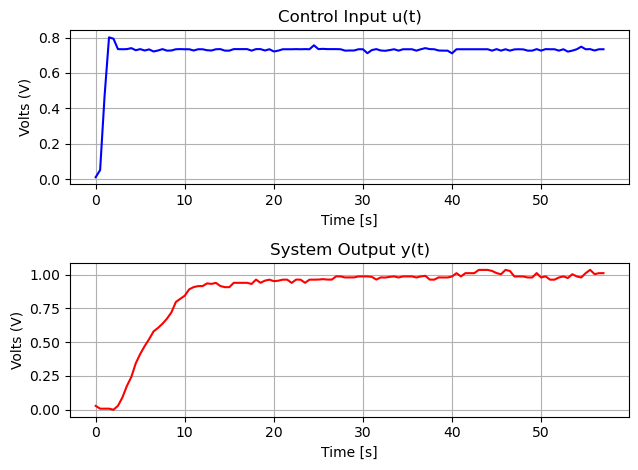

In [142]:
y_normalizado = np.copy(y[5:]) 
u_normalizado = np.copy(u[5:])
t = np.copy(t[5:]) - t[5]

for i in range(len(y_normalizado)):
    y_normalizado[i] = (y_normalizado[i] - yi) / deltaY
    u_normalizado[i] = (u_normalizado[i] - ui) / deltaY

y = y_normalizado
u = u_normalizado

plt.subplot(2, 1, 1)
plt.plot(t, u, 'b-')
plt.title('Control Input u(t)')
plt.xlabel('Time [s]')
plt.ylabel('Volts (V)')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(t, y, 'r-')
plt.title('System Output y(t)')
plt.xlabel('Time [s]')
plt.ylabel('Volts (V)')
plt.grid()
plt.tight_layout()
plt.show()

3. Determinar o momento $m_1$.

No livro ele da um exemplo, porém será seguido o que está no 
[vídeo](https://www.youtube.com/watch?v=dm5cdpsuxlM).

Será escolhido dois pontos e deve-se calcular a área que está
entre os dois pontos. Portanto deve-se escolher dois pontos onde
a área entre eles deve-se ser o mais próximo possível da área entre 
o ultimo ponto escolhido até o sinal de $y(t) = 1$.

m1 = 7.5000


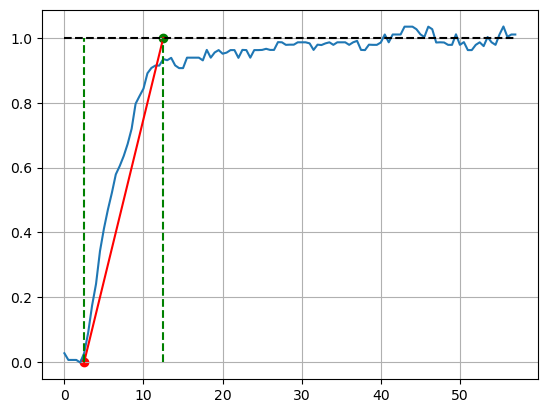

In [190]:
setpoint = np.ones(len(t))

xi = 2.5
xf = 12.5

yf = 1
yi = 0

reta1 = np.linspace(0,1,len(t))
reta2 = np.linspace(0,1,len(t))

temp1 = np.full(len(t), xi)
temp2 = np.full(len(t), xf)

angulo = np.linspace(xi, xf, len(t))
m = (yf - yi) / (xf - xi)
reta = m * (angulo - xi) + yi

m1 = xi + (xf - xi) / 2
print(f'm1 = {m1:.4f}')

plt.plot(t, y)
plt.plot(t, setpoint, 'k--')
plt.scatter(xi, yi, color='red')
plt.scatter(xf, yf, color='green')

plt.plot(angulo, reta, 'r')
plt.plot(temp1, reta1, 'g--')
plt.plot(temp2, reta2, 'g--')

plt.grid()
plt.show()

del temp1, temp2, reta1, reta2, reta

4. Determinar a inclinação da tangente no ponto de inflexão de $y(t)$. Esse valor é Mi. 

Agora deve escolher uma reta que passe no ponto de inflexão na parte transitório
da resposta. Até para o autor, essa escolha é muito arbitrária.


Depois deve-se traçar uma reta para encontrar o coeficiente angular
dessa reta.

0.1


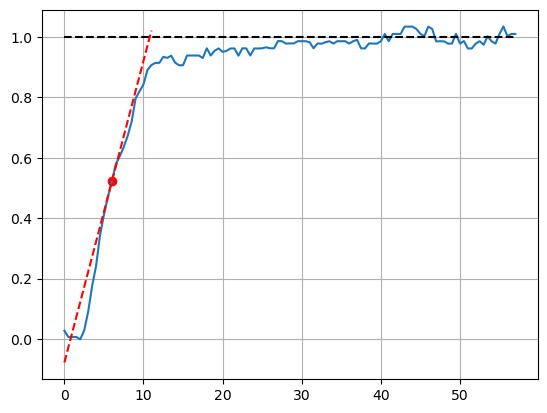

In [192]:
pontoInflexao = 0.5
pontoInflexao = y[np.where(y >= pontoInflexao)[0][0]]

x = t[np.where(y >= pontoInflexao)[0][0]]

# Utilizarei o mesmo angulo m calculado anteriormente
# para desenhar a reta
retaInflexao = m * (t - x) + pontoInflexao
retaInflexao = retaInflexao[np.where(retaInflexao <= 1.05)[0]]

# Como o Mi é o quoecifiente angular da reta que passa
# pelo ponto de inflexão, então Mi = m (pois escolhi m
# para desenhar a reta)
Mi = m
print(Mi)

plt.plot(t, y)
plt.plot(t, setpoint, 'k--')
plt.scatter(x, pontoInflexao, color='red')
plt.plot(t[:len(retaInflexao)],retaInflexao, 'r--')
plt.grid()
plt.show()

5. Determinar $t_m$ que é a interseção da tangente com o valor de regime permamente de $y(t)$

O $tm$ será o tempo em que a reta desenha anteriormente, reta no ponto
de inflexão do regime transitório do sinal de saída, encosta. Visualmente
$t_m \approx 11$

In [196]:
tm = 11

6. Determinar $\lambda$ a partir de $\lambda = (t_m - m1)Mi$

In [ ]:
lambda_ = (tm - m1) * Mi
print(f'Lambda = {lambda_:.4f}')

7. Determinar $\eta$ a partir do gráfico do livro

Essa parte infelizmente deve-se olhar um gráfico disponibilizado pelo autor. E a partir dele
podemos inferir que o valor de $\eta$ que corresponde ao $\lambda=0.35$
é $\eta = 0.5$

![Grafico](GraficoDoExemplo.jpeg)